# Basic Data Exploration 

This script is to be used as a basic analytics report of raw data we receive from clients, and inspects things such as size of the data, data types, null values, and general distributions of the features. It is not tailored to any specific data and as a result some of the plots will not be visually appealing without doing some further feature cleaning and handling of outliers, etc., and is just meant to provide a basic understanding of features as a starting point.

In [17]:
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#Replace the path with the data you are trying to view
data_dir = Path('/Users/alexcroft/Documents/GreenDot/DataExploration')

#Change the read type to view the correct file type you are trying to view
df = pd.concat(pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet'))


In [18]:
#View the data
df.head()

,customerkey,ssntoken,cardkey,plastic_type,is_personalized_ind,perso_temp,has_crv_ind,crv_removed,card_association,iscardpresent,card_present_trans_1,pinind,pin_present_trans,ecivalue,transdtlkey,trancode,trans_type1,trans_type2,terminal_capability,postdate,child_casenumber,parent_casenumber,is_par,account_activation_date,tenure_aging,converted_dispute_created_date,converted_dispute_closed_date,closed_open_status,dispute_amount,dollar_bucket,trans_type,trans_date,merch_name,merch_trunc,mcc,mcc_description,merchant_category,merch_city,merch_state,merch_zip,ips_ind,bin,product_desc,product_stack,product_segment,product_family,online_retail_product,partner_desc,current_credit_rating,dispute_reason,declined_reason,dispute_resolution,dispute_declined_reason,channel_disposition__c,number_of_dispute_transactions_filed_before,casenumber,dispute_created_date,time_post_dispute,timediff_dispute_create_dates,customer_createdate,time_create_dispute,dispute_time_period,target
0,206221600,IQK2IL8QEVI,261118247.0,Non-EMV,Y,Perso,N,No,Visa,True,Card Present,False,No Pin Present,None,6.905834e+09,1001,Signature Purchase,Mag stripe - Signature,EMV,2020-03-19 07:10:52.029254,38925137,38925135,0,2020-02-27 19:19:00,3M,2020-05-03 18:49:20,2020-05-03 18:49:19,Closed,10.9500,<15,Chip – Signature,2020-03-19,BURGER KING #1054,BURGER KING,5814,Fast food restaurants,Miscellaneous Stores,N HOLLYWOOD,CA,91605,Y,414398,3% Unlimited Savings Online Visa,Green Dot,Green Dot Online,3% Unlimited Savings Online Sales,Online,Online Card Sales,,No Auth (Card Lost/Stolen),Invalid - CH Authorized Transaction,Not Granted,Invalid - CH Authorized Transaction,Customer Online,12,38925137,2020-05-04 01:49:20,46.0,-1,2020-02-06 15:38:00,88,observation,no
1,206211179,SATV3Y35RZI,261107380.0,Non-EMV,Y,Perso,N,No,MasterCard,False,Card Not Present,False,No Pin Present,08,7.086557e+09,3001,MOTO (non-3D) with CVV2,MOTO (non-3D) with CVV2,Magtripe,2020-05-17 20:10:53.772064,39587556,39587552,0,2020-02-27 15:59:00,3M,2020-05-18 06:48:59,2020-06-04 17:16:53,Closed,21.6400,15-25,MOTO (non-3D) with CVV2,2020-05-17,XSOLLA *ROBLOX,XSOLLA *ROBLOX,5816,Digital Goods - Games,Miscellaneous Stores,H.XSOLLA.COM,CA,None,Y,527368,TPG Walmart MoneyCard Cash-Back MC,Walmart,Walmart Retail,Walmart BPP,Retail,TPG,,No Auth (Card Still in Possession),Invalid - CH Authorized Transaction,Not Granted,Invalid - CH Authorized Transaction,Customer Online,0,39587556,2020-05-18 13:48:59,1.0,0,2020-02-27 15:57:00,81,observation,no
2,206149683,NCKARIU2OBI,260991685.0,Non-EMV,Y,Perso,N,No,Visa,False,Card Not Present,False,No Pin Present,07,6.914088e+09,1001,MOTO (non-3D) with No CVV2,MOTO (non-3D) with No CVV2,Magtripe,2020-03-22 01:58:52.813925,37430675,37430669,0,2020-02-26 12:12:00,1M,2020-03-22 09:49:03,2020-04-01 20:41:00,Closed,34.4000,25-50,MOTO (non-3D) with No CVV2,2020-03-22,DOORDASH*WINGSTOP,DOORDASH*WINGSTOP,5812,Eating places and restaurants,Miscellaneous Stores,WWW.DOORDASH.,CA,94103,Y,418953,Turbo Visa Debit Card,BaaS,Green Dot Partner,Intuit Turbo,Online,Online Card Sales,,No Auth (Card Still in Possession),Invalid - CH Authorized Transaction,Not Granted,Invalid - CH Authorized Transaction,Customer Online,0,37430675,2020-03-22 16:49:03,0.0,0,2020-02-26 12:11:00,25,observation,no
3,204326961,CKDRPYKPC0I,258608142.0,Non-EMV,Y,Perso,N,No,Visa,True,Card Present,True,Pin Present,None,6.813371e+09,7301,Chip – PIN,Chip – PIN,EMV,2020-02-22 15:49:59.028030,37532844,37532812,0,2020-01-25 01:21:00,3M,2020-03-26 15:13:22,2020-03-26 15:13:20,Closed,5.1900,<15,Chip – PIN,2020-02-22,7-ELEVEN2910 S. MARYLAND,7-ELEVEN,5541,Service stations (with or without ancillary se...,Automobiles and Vehicles,LAS VEGAS,NV,None,Y,418953,Turbo Visa Debit Card,BaaS,Green Dot Partner,Intuit Turbo,Online,Online Card Sales,,No Auth (Card Still in Possession),Not Granted- Due to Result of Investigation,Not Granted,Not Granted- Due to Result of Investigation,Customer Online,12,37532844,2020-03-26 22:13:22,33.0,0,2020-01-25 01:10:00

In [19]:
#Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668211 entries, 0 to 3470
Data columns (total 63 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   customerkey                                  668211 non-null  int64         
 1   ssntoken                                     668211 non-null  object        
 2   cardkey                                      656626 non-null  float64       
 3   plastic_type                                 668211 non-null  object        
 4   is_personalized_ind                          668211 non-null  object        
 5   perso_temp                                   668211 non-null  object        
 6   has_crv_ind                                  668211 non-null  object        
 7   crv_removed                                  668211 non-null  object        
 8   card_association                             668211 non-null  obje

In [20]:
#Check data row and column counts
print(('The dataframe has {} rows and {} columns.').format(df.shape[0],df.shape[1]))

The dataframe has 668211 rows and 63 columns.


In [21]:
#Basic summary statistics for numerical type features
df.describe()

,customerkey,cardkey,transdtlkey,is_par,number_of_dispute_transactions_filed_before,time_post_dispute,timediff_dispute_create_dates,time_create_dispute
count,6.682110e+05,6.566260e+05,6.563270e+05,668211.0,668211.000000,656626.000000,668211.000000,668211.000000
mean,1.996666e+08,2.564423e+08,7.035839e+09,0.0,42.077167,34.959269,-0.234561,128.943638
std,1.663483e+07,1.364245e+07,2.878296e+08,0.0,217.061789,63.011979,0.423724,99.341571
min,5.805710e+05,1.432598e+07,4.873743e+09,0.0,0.000000,0.000000,-1.000000,-58.000000
25%,2.035601e+08,2.579875e+08,6.853017e+09,0.0,0.000000,4.000000,0.000000,59.000000
50%,2.044945e+08,2.591668e+08,6.980932e+09,0.0,1.000000,14.000000,0.000000,96.000000
75%,2.053244e+08,2.607822e+08,7.183490e+09,0.0,16.000000,39.000000,0.000000,188.000000
max,2.100329e+08,2.826542e+08,7.810702e+09,0.0,4330.000000,1210.000000,0.000000,397.000000


In [22]:
#Check how many null values per feature
df.isnull().sum()

customerkey                                         0
ssntoken                                            0
cardkey                                         11585
plastic_type                                        0
is_personalized_ind                                 0
perso_temp                                          0
has_crv_ind                                         0
crv_removed                                         0
card_association                                    0
iscardpresent                                   84540
card_present_trans_1                                0
pinind                                          84554
pin_present_trans                                   0
ecivalue                                       303844
transdtlkey                                     11884
trancode                                        11585
trans_type1                                         0
trans_type2                                         0
terminal_capability         

In [23]:
for val in df.columns:
    print('There are {} unique values for {} in the dataset'.format(len(df[val].unique()),val))

There are 81791 unique values for customerkey in the dataset
There are 78466 unique values for ssntoken in the dataset
There are 90278 unique values for cardkey in the dataset
There are 2 unique values for plastic_type in the dataset
There are 2 unique values for is_personalized_ind in the dataset
There are 2 unique values for perso_temp in the dataset
There are 2 unique values for has_crv_ind in the dataset
There are 2 unique values for crv_removed in the dataset
There are 2 unique values for card_association in the dataset
There are 3 unique values for iscardpresent in the dataset
There are 2 unique values for card_present_trans_1 in the dataset
There are 3 unique values for pinind in the dataset
There are 2 unique values for pin_present_trans in the dataset
There are 12 unique values for ecivalue in the dataset
There are 574183 unique values for transdtlkey in the dataset
There are 41 unique values for trancode in the dataset
There are 28 unique values for trans_type1 in the dataset

In [24]:
#Numerical Feature Analysis
numerics = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=numerics)
print('Numerical features in the data are {}'.format(list(num_df.columns)))

Numerical features in the data are ['customerkey', 'cardkey', 'transdtlkey', 'is_par', 'number_of_dispute_transactions_filed_before', 'time_post_dispute', 'timediff_dispute_create_dates', 'time_create_dispute']


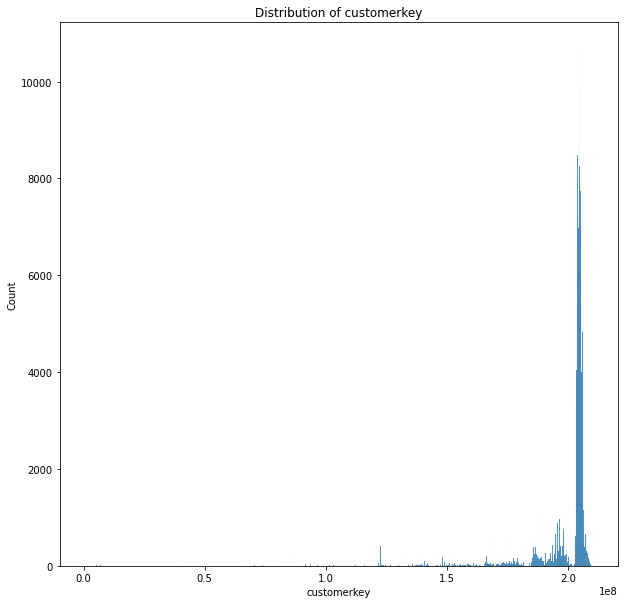

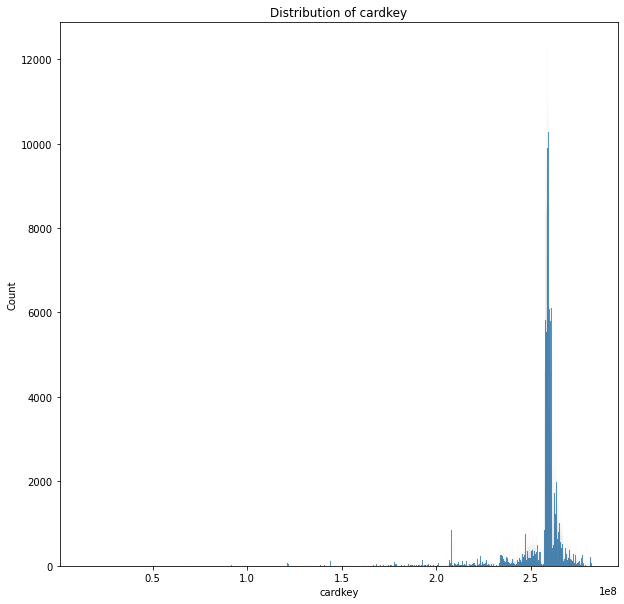

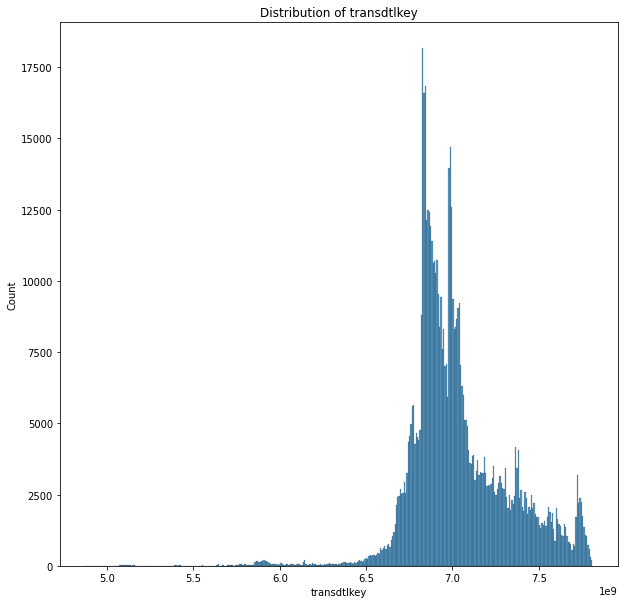

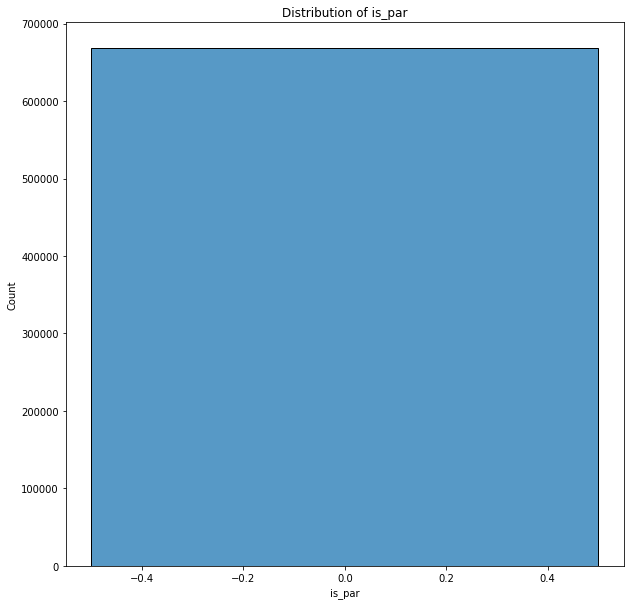

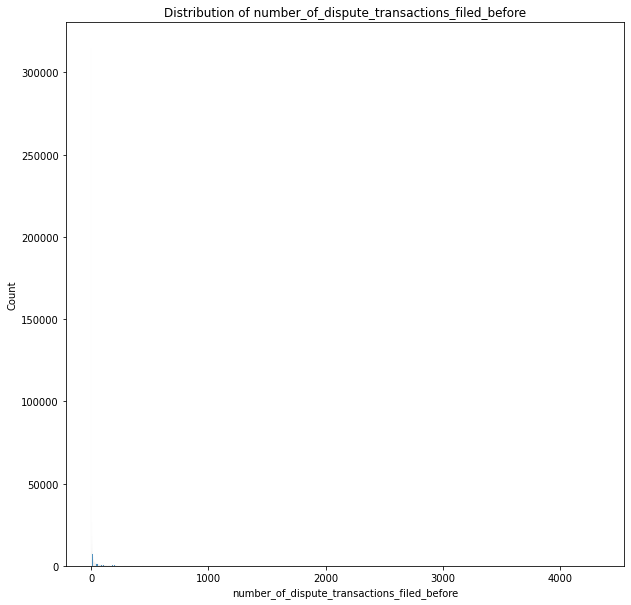

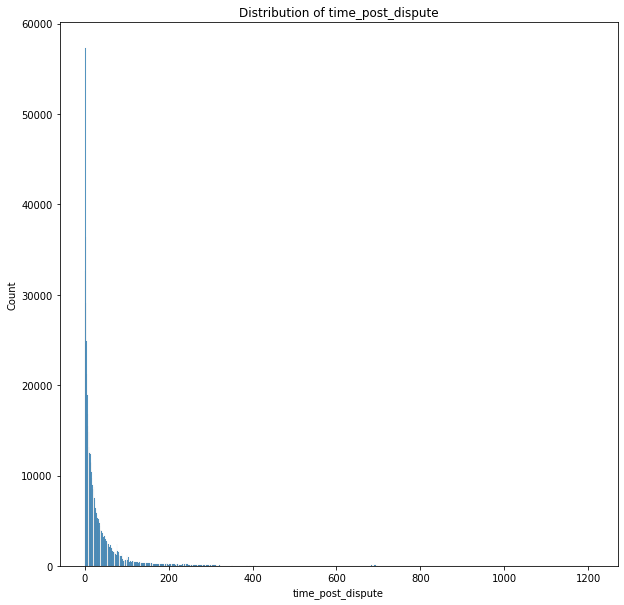

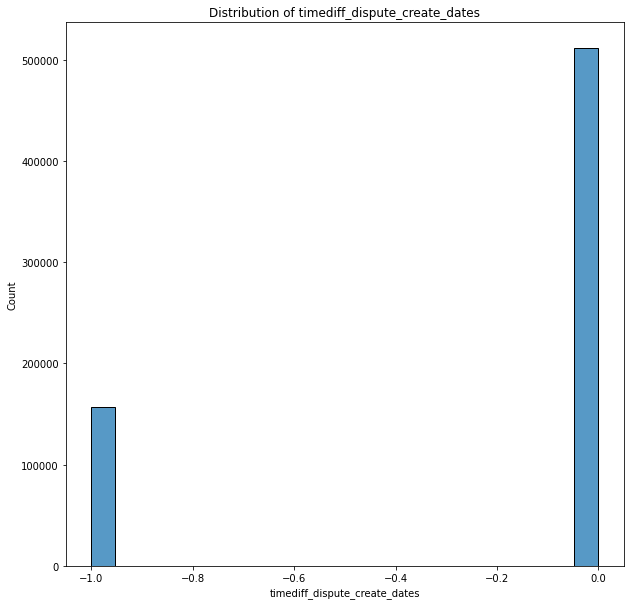

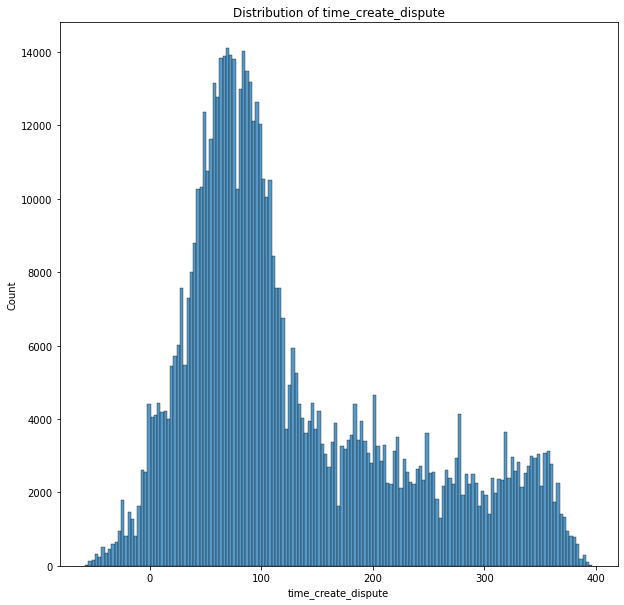

In [25]:
#Examine distribution of numeric features using histograms
for i in range(len(num_df.columns)):
    plt.figure(figsize=(10,10))
    sns.histplot(num_df[num_df.columns[i]])
    plt.title('Distribution of {}'.format(num_df.columns[i]))
plt.show()
    

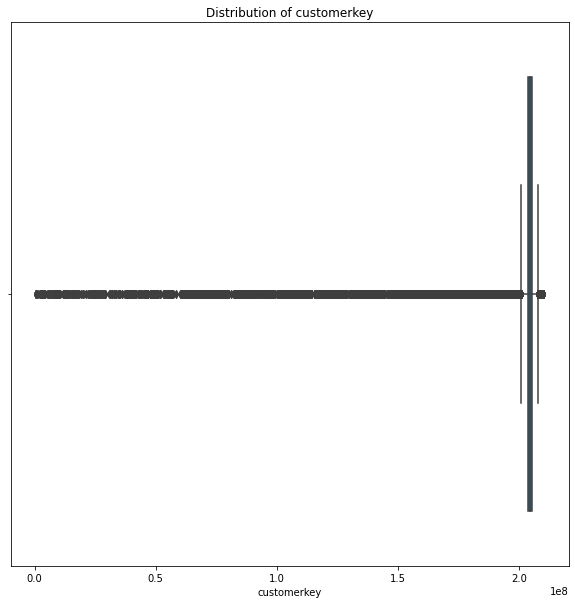

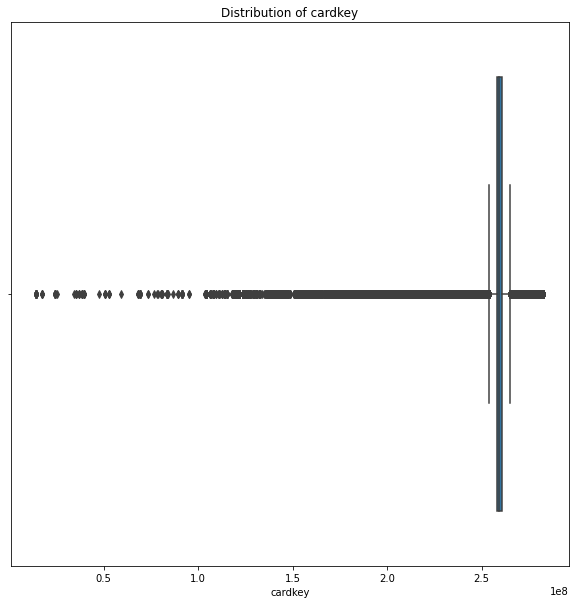

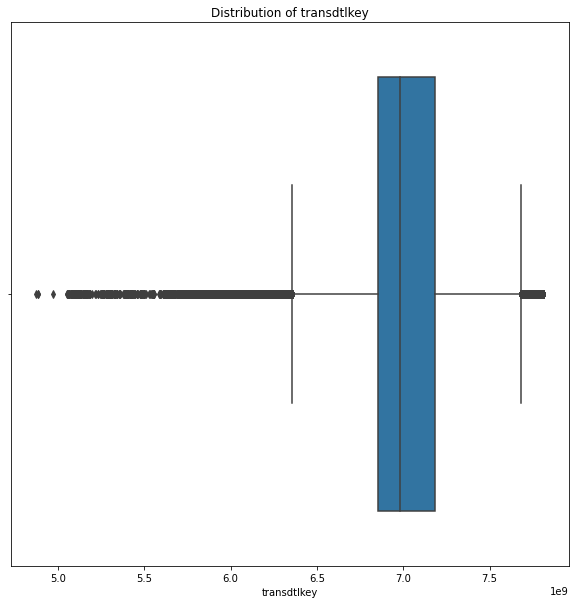

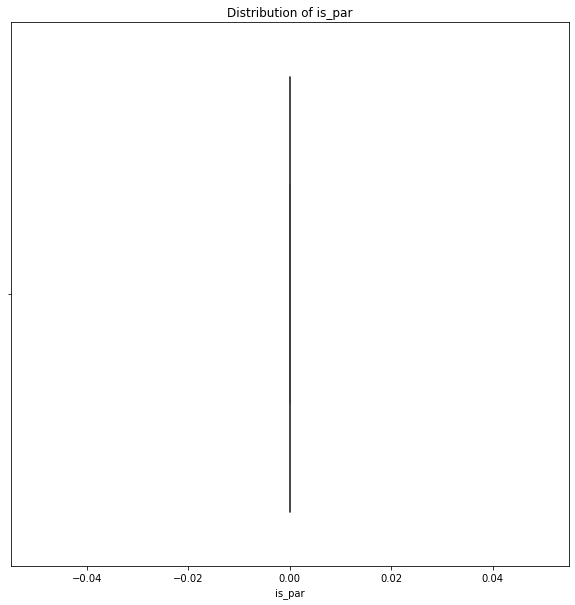

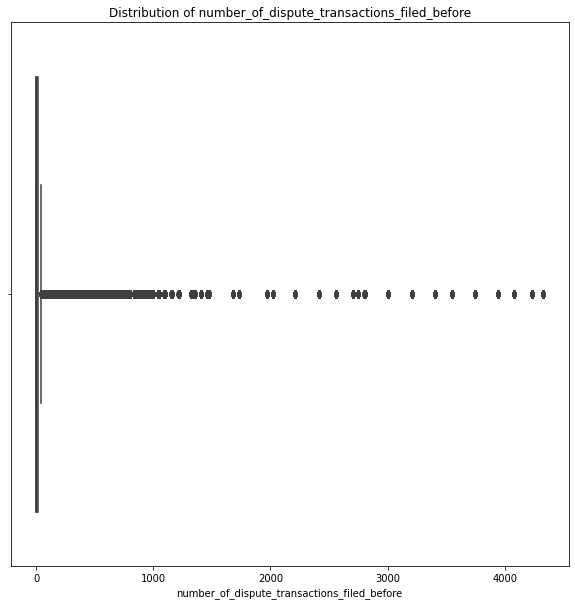

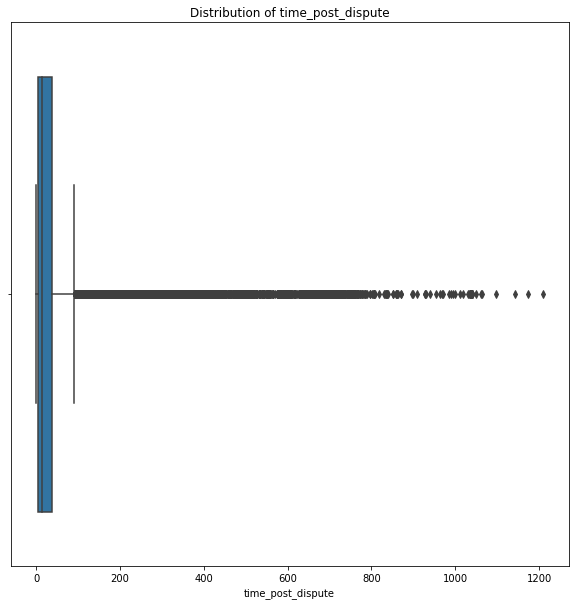

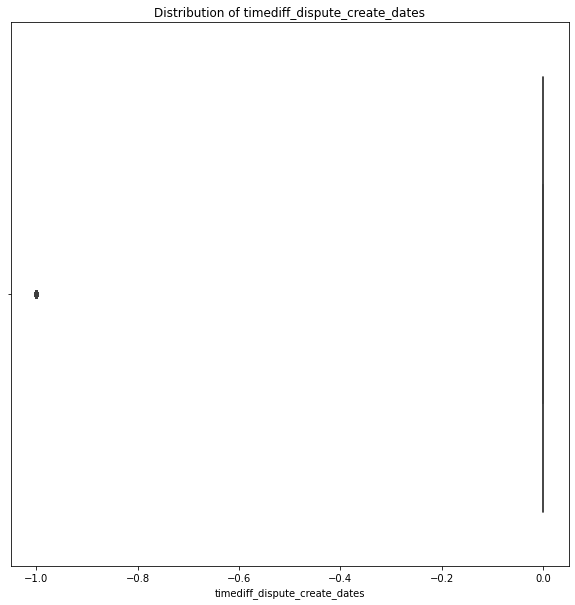

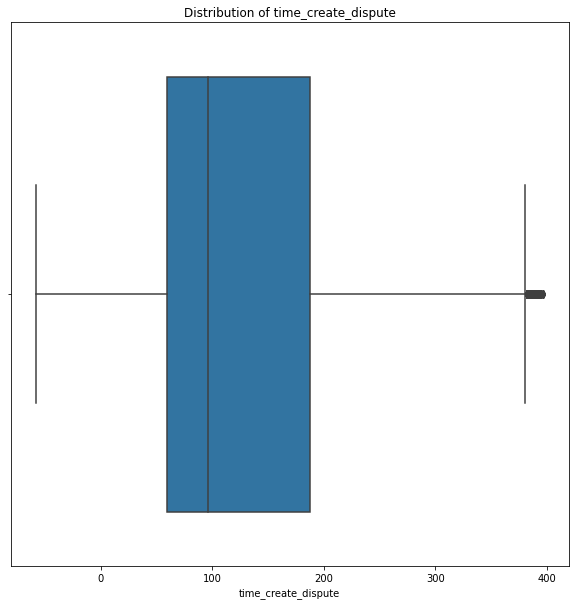

In [26]:
#Examine distribution of numeric features using boxplot
for i in range(len(num_df.columns)):
    plt.figure(figsize=(10,10))
    sns.boxplot(num_df[num_df.columns[i]])
    plt.title('Distribution of {}'.format(num_df.columns[i]))
plt.show()
    

In [27]:
#Categorical Feature Analysis
cat_df = df.select_dtypes(include='object')
print('Categorical features in the data are {}'.format(list(cat_df.columns)))

Categorical features in the data are ['ssntoken', 'plastic_type', 'is_personalized_ind', 'perso_temp', 'has_crv_ind', 'crv_removed', 'card_association', 'iscardpresent', 'card_present_trans_1', 'pinind', 'pin_present_trans', 'ecivalue', 'trancode', 'trans_type1', 'trans_type2', 'terminal_capability', 'child_casenumber', 'parent_casenumber', 'tenure_aging', 'closed_open_status', 'dispute_amount', 'dollar_bucket', 'trans_type', 'merch_name', 'merch_trunc', 'mcc', 'mcc_description', 'merchant_category', 'merch_city', 'merch_state', 'merch_zip', 'ips_ind', 'bin', 'product_desc', 'product_stack', 'product_segment', 'product_family', 'online_retail_product', 'partner_desc', 'current_credit_rating', 'dispute_reason', 'declined_reason', 'dispute_resolution', 'dispute_declined_reason', 'channel_disposition__c', 'casenumber', 'dispute_time_period', 'target']


In [28]:
#Create a dataset containing the categorical variables with 15 or less unique values for inspection
cat_15_unique = []

for val in cat_df.columns:
    if len(df[val].unique())<=15:
        cat_15_unique.append(val)
        
cat_15_df = cat_df[cat_15_unique]

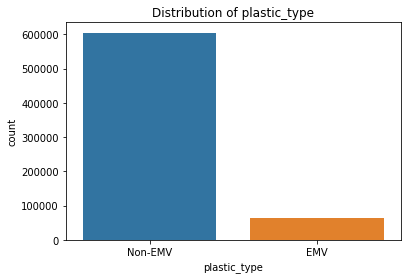

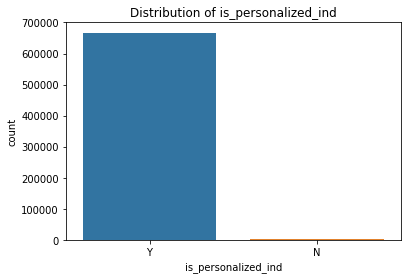

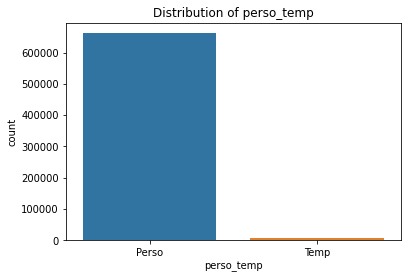

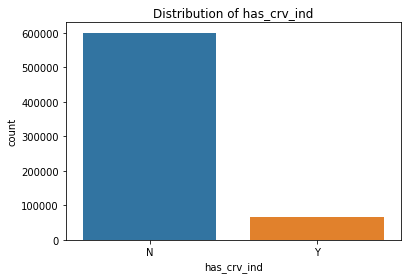

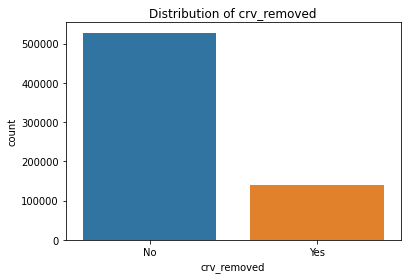

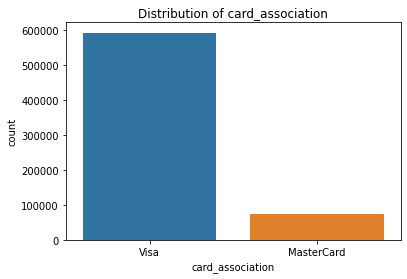

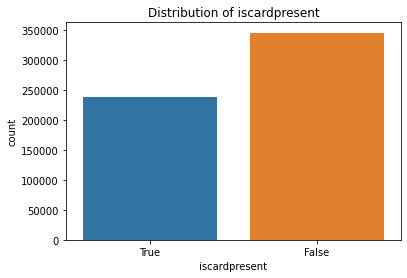

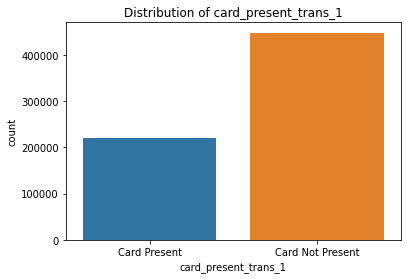

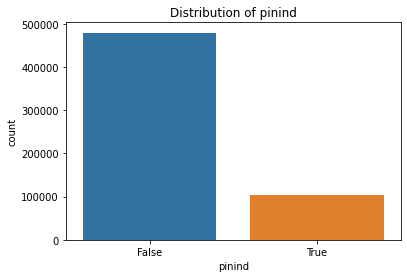

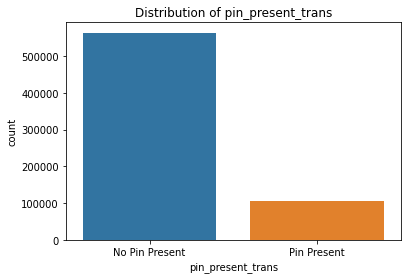

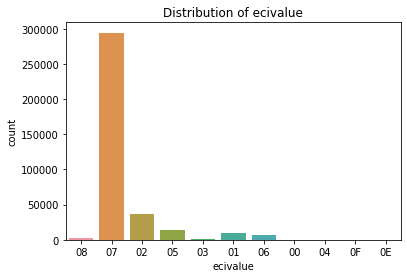

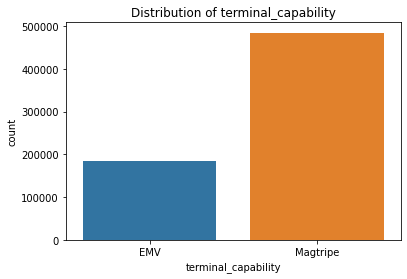

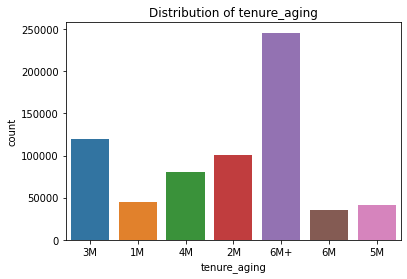

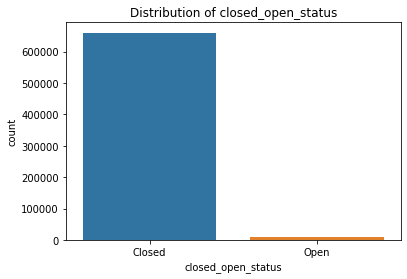

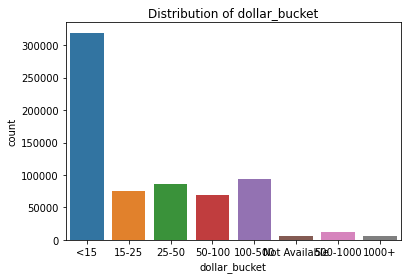

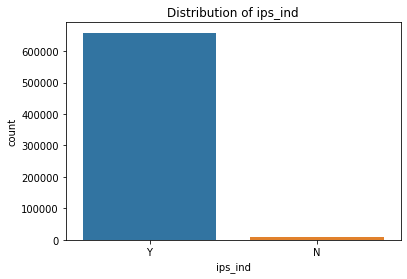

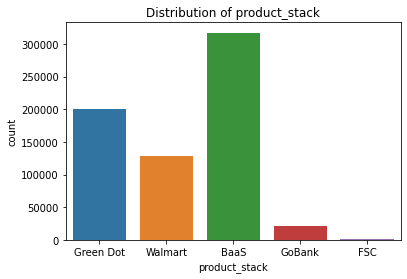

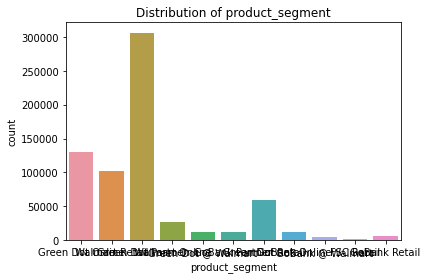

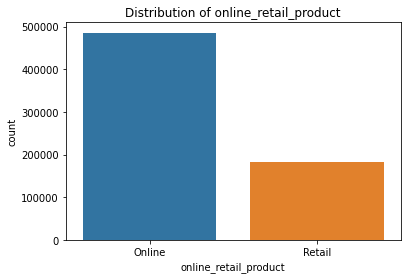

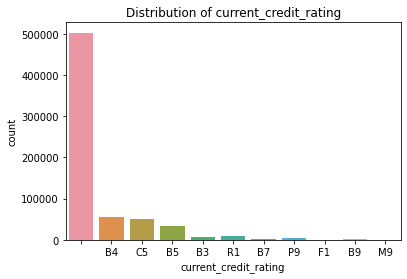

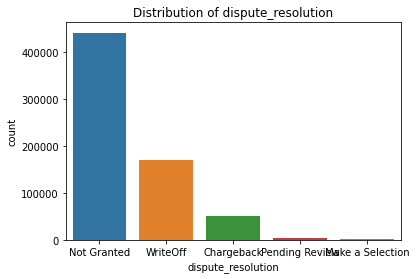

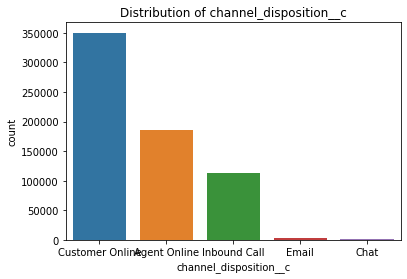

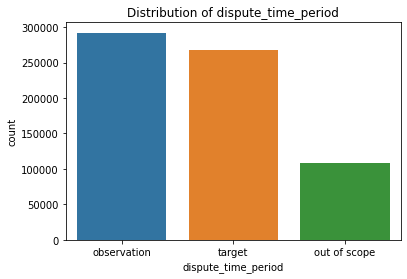

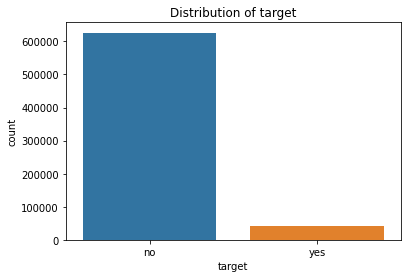

In [29]:
#Countplots of categorical features where there are 15 or less unique values
for i in range(len(cat_15_df.columns)):
    plt.figure()
    sns.countplot(cat_15_df[cat_15_df.columns[i]])
    plt.title('Distribution of {}'.format(cat_15_df.columns[i]))
plt.show()